In [18]:
#ALUMNO: JUAN DIEGO POZO ORTIZ 
#CÓDIGO: 20210679

In [19]:
import os


import geopandas as gpd
from  fiona import listlayers

#maps
thailandMaps='https://github.com/juandiegopozo-10/tareadatos3/raw/main/maps2/thailandMaps_4239.gpkg'

#layers in maps
listlayers(thailandMaps)

['country', 'cities', 'rivers']

In [20]:
thailand=gpd.read_file(thailandMaps,layer='country')
thailand_cities=gpd.read_file(thailandMaps,layer='cities')
thailand_rivers=gpd.read_file(thailandMaps,layer='rivers')

In [21]:
thailand.crs.to_epsg()==thailand_cities.crs.to_epsg()==thailand_rivers.crs.to_epsg()

True

<Axes: >

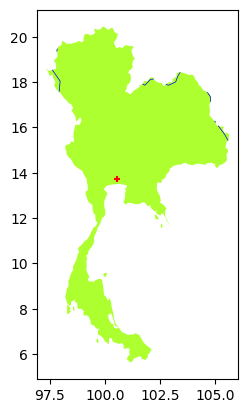

In [22]:
# plotting
base = thailand.plot(facecolor="greenyellow")
thailand_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
thailand_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [23]:
thailand

,COUNTRY,geometry
0,Thailand,"MULTIPOLYGON (((102.91972 11.63392, 102.91249 ..."


In [24]:
thailand.boundary

0    MULTILINESTRING ((102.91972 11.63392, 102.9124...
dtype: geometry

<Axes: >

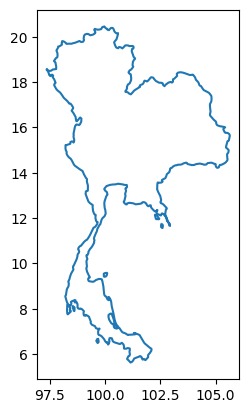

In [25]:
thailand.boundary.plot()

In [26]:
type(thailand.boundary)

geopandas.geoseries.GeoSeries

In [27]:
# converting into GDF
thailand.boundary.to_frame()

,0
0,"MULTILINESTRING ((102.91972 11.63392, 102.9124..."


In [28]:
# conversion
thailand_border=thailand.boundary.to_frame()

# new column (optional)
thailand_border['name']='Thailand'

# renaming the geometry column
thailand_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
thailand_border = thailand_border.set_geometry("geometry")

# verifying:
thailand_border.crs

<Geographic 2D CRS: EPSG:4239>
Name: Indian 1954
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Myanmar (Burma) - onshore; Thailand - onshore.
- bounds: (92.2, 5.63, 105.64, 28.55)
Datum: Indian 1954
- Ellipsoid: Everest 1830 (1937 Adjustment)
- Prime Meridian: Greenwich

In [29]:
thailand_border

,geometry,name
0,"MULTILINESTRING ((102.91972 11.63392, 102.9124...",Thailand


In [41]:
thailand_states=gpd.read_file(os.path.join("maps2","tha_adm_ibge_2020_shp","tha_admbnda_adm1_rtsd_20220121.shp"))
thailand_municipalities=gpd.read_file(os.path.join("maps2","tha_adm_ibge_2020_shp","tha_admbnda_adm2_rtsd_20220121.shp"))

DriverError: Unable to open maps2\tha_adm_ibge_2020_shp\tha_admbnda_adm1_rtsd_20220121.shx or maps2\tha_adm_ibge_2020_shp\tha_admbnda_adm1_rtsd_20220121.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [43]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","th-airports.csv"))

# see

infoairports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,28118,VTBS,large_airport,Suvarnabhumi Airport,13.681099891662598,100.74700164794922,5,AS,Thailand,TH,...,Bangkok,1,VTBS,BKK,NaN,NaN,https://en.wikipedia.org/wiki/Suvarnabhumi_Air...,NaN,51150,2009-01-29T16:23:22+00:00
2,26638,VTBD,large_airport,Don Mueang International Airport,13.9125995636,100.607002258,9,AS,Thailand,TH,...,Bangkok,1,VTBD,DMK,NaN,http://www2.airportthai.co.th/airportnew/bangk...,https://en.wikipedia.org/wiki/Don_Mueang_Inter...,"Old Bangkok International Airport, Don Muang R...",1000,2014-01-27T11:03:44+00:00
3,26674,VTSP,large_airport,Phuket International Airport,8.1132,98.316902,82,AS,Thailand,TH,...,Phuket,1,VTSP,HKT,NaN,NaN,https://en.wikipedia.org/wiki/Phuket_Internati...,NaN,1050,2017-04-28T19:11:13+00:00
4,26647,VTCC,large_airport,Chiang Mai International Airport,18.766799926799997,98.962600708,1036,AS,Thailand,TH,...,Chiang Mai,1,VTCC,CNX,NaN,NaN,https://en.wikipedia.org/wiki/Chiang_Mai_Inter...,NaN,1050,2010-09-01T19:15:28+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,26646,VTBW,small_airport,Watthana Nakhon Airport,13.769203,102.316017,200,AS,Thailand,TH,...,Watthana Nakhon,0,VTBW,NaN,NaN,NaN,NaN,NaN,50,2022-11-26T22:20:06+00:00
110,504798,TH-0041,heliport,Skydance Helipad,8.0779,98.3017,NaN,AS,Thailand,TH,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2022-11-13T02:31:05+00:00
111,339964,TH-0009,heliport,Khao Khitchakut Heliport,12.836021,102.168767,NaN,AS,Thailand,TH,...,Khao Khitchakut,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-01-21T15:00:36+00:00
112,356370,TH-0031,closed,Ko Pha-ngan Airport,9.741118,100.070686,900,AS,Thailand,TH,...,Pha-ngan Island,0,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Ko_Pha-ngan_Airport,NaN,0,2022-08-28T13:05:49+00:00


In [44]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           113 non-null    object
 1   type           113 non-null    object
 2   latitude_deg   113 non-null    object
 3   longitude_deg  113 non-null    object
 4   elevation_ft   73 non-null     object
 5   region_name    113 non-null    object
 6   municipality   84 non-null     object
dtypes: object(7)
memory usage: 6.3+ KB


In [45]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           113 non-null    object 
 1   type           113 non-null    object 
 2   latitude_deg   113 non-null    float64
 3   longitude_deg  113 non-null    float64
 4   elevation_ft   73 non-null     float64
 5   region_name    113 non-null    object 
 6   municipality   84 non-null     object 
dtypes: float64(3), object(4)
memory usage: 6.3+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

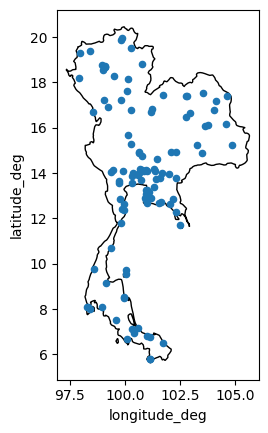

In [46]:
base = thailand.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [47]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=4326)# the coordinates were in degrees - unprojected

In [48]:
airports=airports.to_crs(4239)

<Axes: >

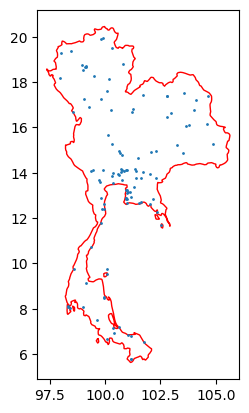

In [49]:

base = thailand.plot(color='white', edgecolor='red')
airports.plot(ax=base,markersize=1)

In [50]:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [51]:
airports['type'].value_counts()

type
small_airport     65
medium_airport    39
large_airport      4
heliport           3
closed             2
Name: count, dtype: int64

In [52]:
airports.rename(columns={'type':'kind'},inplace=True)

In [58]:
from folium import LayerControl

m = airports[airports.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports[airports.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports[airports.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airports[airports.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports[airports.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

In [66]:
centroThailand=thailand.centroid
centroThailand


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13144\1009624676.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroThailand=thailand.centroid


0    POINT (101.02088 15.12572)
dtype: geometry

In [67]:
type(centroThailand), type(centroThailand.x)

(geopandas.geoseries.GeoSeries, pandas.core.series.Series)

In [68]:
type(centroThailand.x[0]),type(centroThailand.y[0])

(numpy.float64, numpy.float64)

In [69]:
fig, axs = plt.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))

centroidX=centroThailand.x[0]
centroidY=centroThailand.y[0]

axs[0,0].set_title('LeftOf_Centroid, Above_Centroid',fontsize=5)
thailand_municipalities.cx[:centroidX,centroidY:].plot(ax=axs[0,0])

axs[0,1].set_title('RightOf_Centroid, Above_Centroid',fontsize=5)
thailand_municipalities.cx[centroidX:,centroidY:].plot(ax=axs[0,1])

axs[1,0].set_title('LeftOf_Centroid, Below_Centroid',fontsize=5)
thailand_municipalities.cx[:centroidX,:centroidY].plot(ax=axs[1,0])

axs[1,1].set_title('RightOf_Centroid, Below_Centroid',fontsize=5)
thailand_municipalities.cx[centroidX:,:centroidY].plot(ax=axs[1,1]) ;

NameError: name 'plt' is not defined